<a href="https://colab.research.google.com/github/amohd63/ENCS5141-INTELLIGENT-SYSTEMS-LAB/blob/main/ENCS5141_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imbalanced classes

In this section, we are comparing between Random forest and XGboost when handling imbalanced dataset.

**Dataset**: [Breast Cancer Wisconsin (Diagnostic)](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

Scikit learn URL: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

**Evaluation metric**: F1 score.

In [ ]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

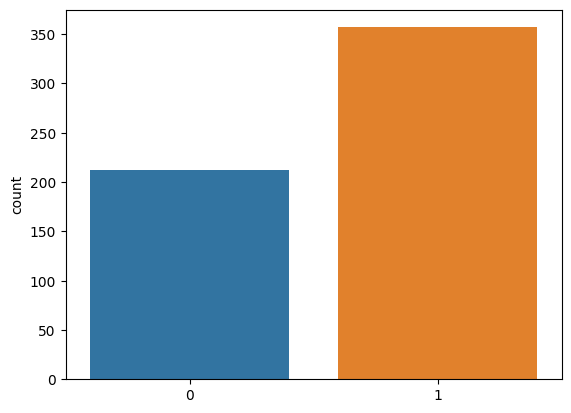

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)

plt.show()

In [ ]:
from numpy import unique

classes = unique(y)
breakdown = ''
for c in classes:
 total = len(y[y == c])
 ratio = (total / float(len(y))) * 100
 print(' - Class %s: %d (%.5f%%)' % (str(c), total, ratio))

 - Class 0: 212 (37.25835%)
 - Class 1: 357 (62.74165%)


We clearly see the dataset is imbalanced, the percentage of imbalance between two classes should be less than 40%.

## Random forest

Firstly, we train the Random forest classifier with default values of paramters.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import psutil
import time

classifier= RandomForestClassifier()

memory_usage_b = psutil.virtual_memory()[3]/1000000000
start_time = time.time()

classifier.fit(x_train, y_train)

end_time = time.time()
memory_usage_a = psutil.virtual_memory()[3]/1000000000

training_time = end_time - start_time
memory_usage = (memory_usage_a - memory_usage_b)*1000

y_pred= classifier.predict(x_test)
print(classification_report(y_pred, y_test))

fs = f1_score(y_pred, y_test)

print(f"F1 score: {fs:.4f}")
print(f"Random Forest Training time: {training_time} seconds")
print(f"Random Forest Memory usage: {memory_usage} MB")

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        55
           1       0.97      0.99      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

F1 score: 0.9721
Random Forest Training time: 0.32067108154296875 seconds
Random Forest Memory usage: 113.32547200000019 MB


Confusion matrix

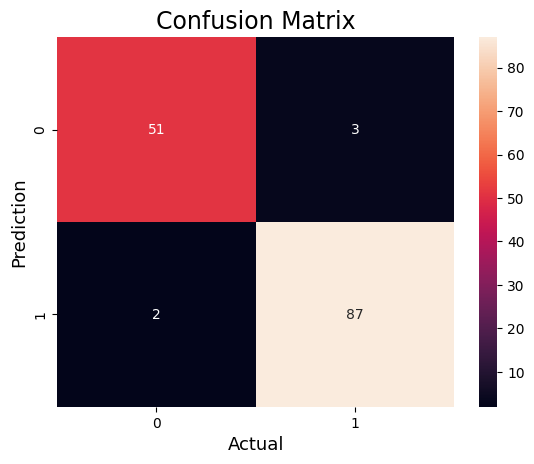

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

c_m = confusion_matrix(y_pred, y_test)
sns.heatmap(c_m, annot=True, fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Hyperparamter tuning of random forest

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [5, 9, None],
    'max_leaf_nodes': [3, 7, None],
}

grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)

grid_search.fit(x_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_features='log2', n_estimators=50)


Retrain the random forst model and obtain the results.

In [ ]:
classifier= grid_search.best_estimator_

memory_usage_b = psutil.virtual_memory()[3]/1000000000
start_time = time.time()

classifier.fit(x_train, y_train)

end_time = time.time()
memory_usage_a = psutil.virtual_memory()[3]/1000000000

training_time = end_time - start_time
memory_usage = (memory_usage_a - memory_usage_b)*1000

y_pred= classifier.predict(x_test)
print(classification_report(y_pred, y_test))

fs = f1_score(y_pred, y_test)

print(f"F1 score: {fs:.4f}")
print(f"Random Forest Training time: {training_time} seconds")
print(f"Random Forest Memory usage: {memory_usage} MB")

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        55
           1       0.97      0.99      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

F1 score: 0.9775
Random Forest Training time: 0.5106581687927246 seconds
Random Forest Memory usage: 145.3854720000002 MB


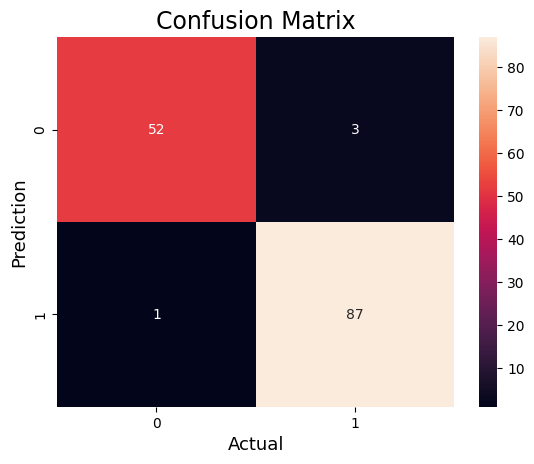

In [ ]:
c_m = confusion_matrix(y_pred, y_test)
sns.heatmap(c_m, annot=True, fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

## XGBoost

Train the XGBoost.

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import psutil
import time

classifier= XGBClassifier()

memory_usage_b = psutil.virtual_memory()[3]/1000000000
start_time = time.time()

classifier.fit(x_train, y_train)

end_time = time.time()
memory_usage_a = psutil.virtual_memory()[3]/1000000000

training_time = end_time - start_time
memory_usage = (memory_usage_a - memory_usage_b)*1000

y_pred= classifier.predict(x_test)
print(classification_report(y_pred, y_test))

fs = f1_score(y_pred, y_test)

print(f"F1 score: {fs:.4f}")
print(f"XGBoost Training time: {training_time} seconds")
print(f"XGBoost Memory usage: {memory_usage} MB")

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        55
           1       0.97      0.99      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

F1 score: 0.9775
XGBoost Training time: 0.4304213789914623 seconds
XGBoost Memory usage: 85.93123879854123 MB


Confusion matrix

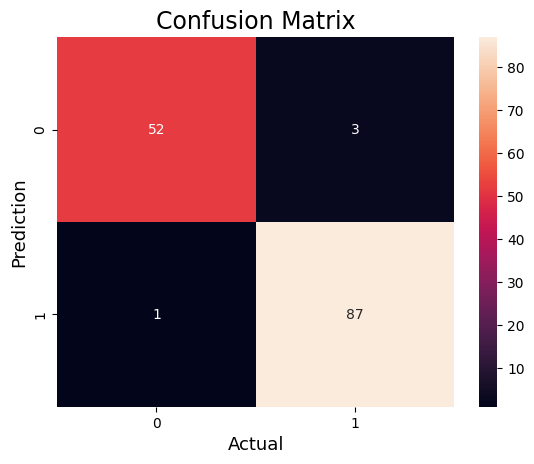

In [ ]:
c_m = confusion_matrix(y_pred, y_test)
sns.heatmap(c_m, annot=True, fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier

params = {
    "colsample_bytree": [0.3, None],
    "gamma": [0.5, None],
    "learning_rate": [0.5, None],
    "max_depth": [5, None],
    "n_estimators": [25, 50, 100, None],
    "subsample": [0.5, None]
}

grid_search = GridSearchCV(XGBClassifier(),
                           param_grid=params,
                           n_jobs=10)

grid_search.fit(x_train, y_train)
print(grid_search.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


Retrain the model

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import psutil
import time

classifier= grid_search.best_estimator_

memory_usage_b = psutil.virtual_memory()[3]/1000000000
start_time = time.time()

classifier.fit(x_train, y_train)

end_time = time.time()
memory_usage_a = psutil.virtual_memory()[3]/1000000000

training_time = end_time - start_time
memory_usage = (memory_usage_a - memory_usage_b)*1000

y_pred= classifier.predict(x_test)
print(classification_report(y_pred, y_test))

fs = f1_score(y_pred, y_test)

print(f"F1 score: {fs:.4f}")
print(f"XGBoost Training time: {training_time} seconds")
print(f"XGBoost Memory usage: {memory_usage} MB")

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        56
           1       0.97      1.00      0.98        87

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143

F1 score: 0.9831
XGBoost Training time: 0.6284282289010673 seconds
XGBoost Memory usage: 109.79523072850122 MB


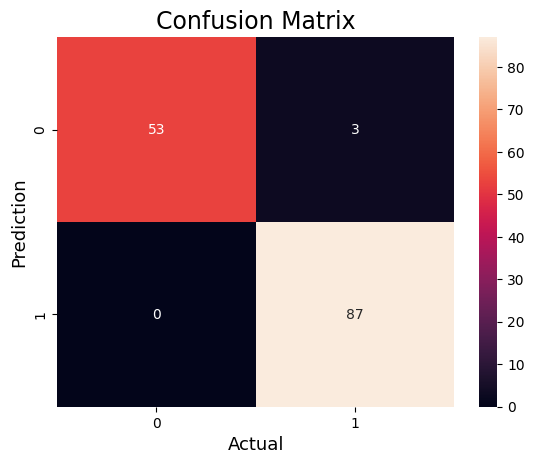

In [ ]:
c_m = confusion_matrix(y_pred, y_test)
sns.heatmap(c_m, annot=True, fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

## References

- https://www.datacamp.com/tutorial/diving-deep-imbalanced-data

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

- https://www.javatpoint.com/machine-learning-random-forest-algorithm

- https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data#:~:text=A%20classification%20data%20set%20with,smaller%20proportion%20are%20minority%20classes.

- https://www.geeksforgeeks.org/random-forest-hyperparameter-tuning-in-python/

- https://www.researchgate.net/publication/322396974_Breast_Cancer_Recurrence_Prediction_Using_Random_Forest_Model

- https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download

- https://www.kaggle.com/code/badrmedhatbadr/breast-cancer-classification/notebook

- https://www.kaggle.com/code/stuarthallows/using-xgboost-with-scikit-learn

- https://www.kaggle.com/code/streetlamb/ensemble-with-xgboost-and-random-forest

- https://medium.com/@srishtisawla/fine-tuning-your-xgboost-model-with-key-hyperparameters-afe2f1df5cd4

- https://medium.com/@rithpansanga/the-main-parameters-in-xgboost-and-their-effects-on-model-performance-4f9833cac7c#:~:text=n_estimators,is%20between%20100%20and%201000.

- https://www.kaggle.com/code/pratikkgandhi/predicting-breast-cancer-with-random-forest-95

- https://www.researchgate.net/publication/322396974_Breast_Cancer_Recurrence_Prediction_Using_Random_Forest_Model

- https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download

- https://www.kaggle.com/code/badrmedhatbadr/breast-cancer-classification/notebook

- https://www.kaggle.com/code/hanzlanawaz/99-breast-cancer-prediction-using-xgboost

- https://medium.com/analytics-vidhya/random-forest-classifier-and-its-hyperparameters-8467bec755f6

- https://www.kaggle.com/code/streetlamb/ensemble-with-xgboost-and-random-forest

---

# Noisy data or features

**Dataset**: [UCI Adult Income](https://archive.ics.uci.edu/dataset/2/adult)

Scikit learn URL: https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Census%20income%20classification%20with%20scikit-learn.html

**Evaluation metric**: Precision.

A good dataset for comparing the Random Forest and XGBoost models would be the UCI Adult Income dataset. This dataset predicts whether income exceeds $50K/yr based on census data. It contains a mix of continuous and categorical variables and has missing values, which can be considered as noise.

The target variable is income which is divided into two classes: <=50K and >50K.

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 6.7 MB/s eta 0:00:00


In [ ]:
from shap.datasets import adult
X, y = adult()

In [ ]:
X.head()

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,7,13.0,4,1,0,4,1,2174.0,0.0,40.0,39
1,50.0,6,13.0,2,4,4,4,1,0.0,0.0,13.0,39
2,38.0,4,9.0,0,6,0,4,1,0.0,0.0,40.0,39
3,53.0,4,7.0,2,6,4,2,1,0.0,0.0,40.0,39
4,28.0,4,13.0,2,10,5,2,0,0.0,0.0,40.0,5


Finding the number of outliers (noise) using Z-score.

In [ ]:
for column in X:
  # Compute percentiles using Pandas quantile() function
  percentile_25 = X[column].quantile(0.25)
  percentile_50 = X[column].quantile(0.5)
  percentile_75 = X[column].quantile(0.75)

  # Compute interquartile range (IQR)
  iqr = percentile_75 - percentile_25

  LowerBound_Height = percentile_25 - 1.5*iqr
  UpperBound_Height = percentile_75 + 1.5*iqr

  NumRecordsBefore= X.shape[0]
  DroppedRecords=X[(X[column] < LowerBound_Height) | (X[column] > UpperBound_Height)].shape[0]
  print(f"Column [{column}] number of outliers is: {DroppedRecords} ({100*DroppedRecords/NumRecordsBefore}%)")

Column [Age] number of outliers is: 143 (0.4391757009919843%)
Column [Workclass] number of outliers is: 9865 (30.296981050950524%)
Column [Education-Num] number of outliers is: 1198 (3.679248180338442%)
Column [Marital Status] number of outliers is: 0 (0.0%)
Column [Occupation] number of outliers is: 0 (0.0%)
Column [Relationship] number of outliers is: 0 (0.0%)
Column [Race] number of outliers is: 4745 (14.572648260188569%)
Column [Sex] number of outliers is: 0 (0.0%)
Column [Capital Gain] number of outliers is: 2712 (8.328982525106722%)
Column [Capital Loss] number of outliers is: 1519 (4.665090138509259%)
Column [Hours per week] number of outliers is: 9008 (27.664998003746813%)
Column [Country] number of outliers is: 3391 (10.414299315131599%)


Here, we can notice the data is very noisy which is suitable for our objective.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
import psutil
import time

classifier= RandomForestClassifier()

memory_usage_b = psutil.virtual_memory()[3]/1000000000
start_time = time.time()

classifier.fit(x_train, y_train)

end_time = time.time()
memory_usage_a = psutil.virtual_memory()[3]/1000000000

training_time = end_time - start_time
memory_usage = (memory_usage_a - memory_usage_b)*1000

y_pred= classifier.predict(x_test)
print(classification_report(y_pred, y_test))

precision = precision_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Random Forest Training time: {training_time} seconds")
print(f"Random Forest Memory usage: {memory_usage} MB")

              precision    recall  f1-score   support

       False       0.92      0.88      0.90      6439
        True       0.62      0.73      0.67      1702

    accuracy                           0.85      8141
   macro avg       0.77      0.81      0.79      8141
weighted avg       0.86      0.85      0.86      8141

Precision: 0.7212
Random Forest Training time: 2.0962691898345946 seconds
Random Forest Memory usage: 428.396976 MB


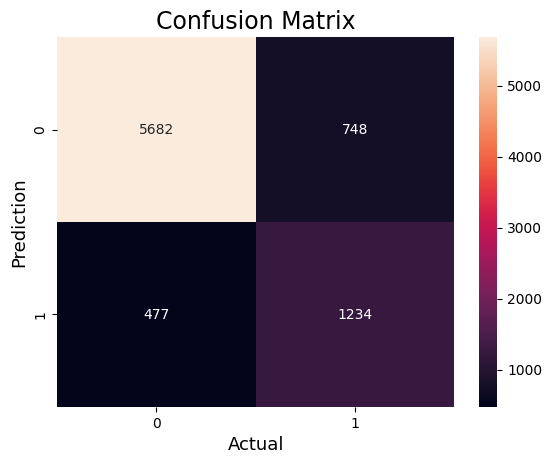

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

c_m = confusion_matrix(y_pred, y_test)
sns.heatmap(c_m, annot=True, fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 9, None],
    'max_leaf_nodes': [5, 9, None],
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid)

grid_search.fit(x_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=9, max_features=None, n_estimators=150)


In [ ]:
classifier= grid_search.best_estimator_

memory_usage_b = psutil.virtual_memory()[3]/1000000000
start_time = time.time()

classifier.fit(x_train, y_train)

end_time = time.time()
memory_usage_a = psutil.virtual_memory()[3]/1000000000

training_time = end_time - start_time
memory_usage = (memory_usage_a - memory_usage_b)*1000

y_pred= classifier.predict(x_test)
print(classification_report(y_pred, y_test))

precision = precision_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Random Forest Training time: {training_time} seconds")
print(f"Random Forest Memory usage: {memory_usage} MB")

              precision    recall  f1-score   support

       False       0.95      0.88      0.91      6674
        True       0.58      0.78      0.67      1467

    accuracy                           0.86      8141
   macro avg       0.76      0.83      0.79      8141
weighted avg       0.88      0.86      0.87      8141

Precision: 0.7846
Random Forest Training time: 5.954276102008011 seconds
Random Forest Memory usage: 581.0920901208009 MB


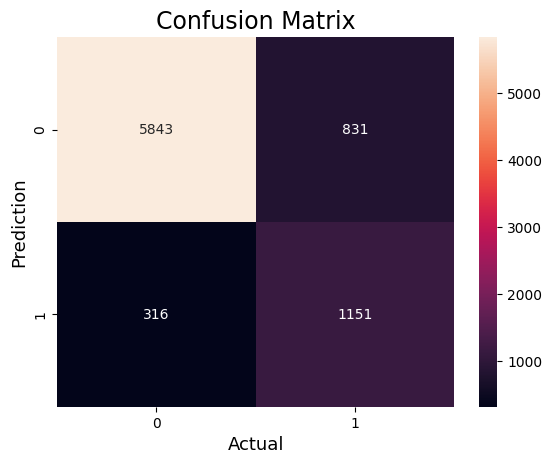

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

c_m = confusion_matrix(y_pred, y_test)
sns.heatmap(c_m, annot=True, fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

## XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
import psutil
import time

classifier= XGBClassifier()

memory_usage_b = psutil.virtual_memory()[3]/1000000000
start_time = time.time()

classifier.fit(x_train, y_train)

end_time = time.time()
memory_usage_a = psutil.virtual_memory()[3]/1000000000

training_time = end_time - start_time
memory_usage = (memory_usage_a - memory_usage_b)*1000

y_pred= classifier.predict(x_test)
print(classification_report(y_pred, y_test))

precision = precision_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"XGBoost Training time: {training_time} seconds")
print(f"XGBoost Memory usage: {memory_usage} MB")

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      6385
           1       0.67      0.76      0.71      1756

    accuracy                           0.87      8141
   macro avg       0.80      0.83      0.81      8141
weighted avg       0.88      0.87      0.87      8141

Precision: 0.7580
XGBoost Training time: 3.227869749069214 seconds
XGBoost Memory usage: 238.9720901208009 MB


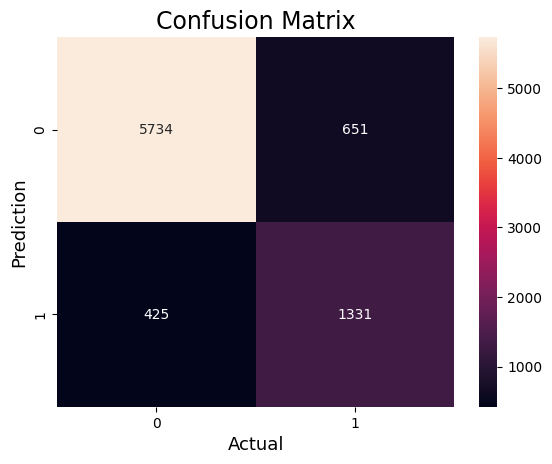

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

c_m = confusion_matrix(y_pred, y_test)
sns.heatmap(c_m, annot=True, fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, randint
import numpy as np
from xgboost import XGBClassifier

params = {
    "colsample_bytree": [0.5, None],
    "gamma": [0.2, 0.5, None],
    "learning_rate": [0.5, 1, None],
    "max_depth": [2, None],
    "n_estimators": [25, 50, 100, None],
    "subsample": [0.6, None]
}

grid_search = GridSearchCV(XGBClassifier(),
                           param_grid=params,
                           n_jobs=10)
grid_search.fit(x_train, y_train)
print(grid_search.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Define and train the XGBoost model
classifier = grid_search.best_estimator_

memory_usage_b = psutil.virtual_memory()[3]/1000000000
start_time = time.time()

classifier.fit(x_train, y_train)

end_time = time.time()
memory_usage_a = psutil.virtual_memory()[3]/1000000000

training_time = end_time - start_time
memory_usage = (memory_usage_a - memory_usage_b)*1000

y_pred= classifier.predict(x_test)
print(classification_report(y_pred, y_test))

precision = precision_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"XGBoost Training time: {training_time} seconds")
print(f"XGBoost Memory usage: {memory_usage} MB")

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      6449
           1       0.66      0.77      0.71      1692

    accuracy                           0.87      8141
   macro avg       0.80      0.83      0.81      8141
weighted avg       0.88      0.87      0.87      8141

Precision: 0.7713
XGBoost Training time: 6.540289242923419 seconds
XGBoost Memory usage: 412.80528190927527 MB


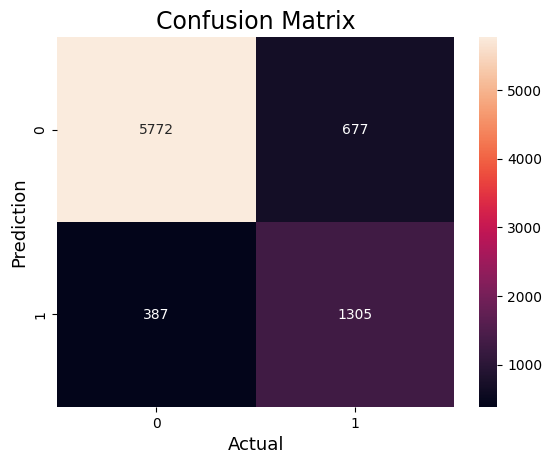

In [ ]:
c_m = confusion_matrix(y_pred, y_test)
sns.heatmap(c_m, annot=True, fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

## References

- https://www.kaggle.com/code/grayphantom/income-prediction-using-random-forest-and-xgboost

- https://medium.com/analytics-vidhya/tuning-random-forest-algorithm-to-predict-income-14005371656e

- https://www.kaggle.com/datasets/uciml/adult-census-income/data

- https://www.kaggle.com/code/rchiranjeevisrinivas/adult-census-income-model-building

- https://www.kaggle.com/code/dvorianchikova/adult-dataset

---

# Large dataset

**Dataset**: [Covertype](https://archive.ics.uci.edu/dataset/31/covertype)

Scikit learn URL: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html

**Evaluation metric**: Accuracy.

Load the dataset.

In [ ]:
from sklearn.datasets import fetch_covtype
df = fetch_covtype(as_frame=True)

In [ ]:
df.frame.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [ ]:
from sklearn.preprocessing import LabelEncoder

X, y = df.data, df.target
le = LabelEncoder()
y = le.fit_transform(y)

Target class ranges from 1-7, we encode it to make it start from 0-6.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import psutil
import time

classifier= RandomForestClassifier()

memory_usage_b = psutil.virtual_memory()[3]/1000000000
start_time = time.time()

classifier.fit(x_train, y_train)

end_time = time.time()
memory_usage_a = psutil.virtual_memory()[3]/1000000000

training_time = end_time - start_time
memory_usage = (memory_usage_a - memory_usage_b)*1000

y_pred= classifier.predict(x_test)
print(classification_report(y_pred, y_test))

accuracy = accuracy_score(y_pred, y_test)

print(f"Accuracy: {accuracy:.4f}")
print(f"Random Forest Training time: {training_time} seconds")
print(f"Random Forest Memory usage: {memory_usage} MB")

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     51850
           1       0.97      0.95      0.96     72623
           2       0.96      0.94      0.95      9073
           3       0.84      0.91      0.87       650
           4       0.77      0.94      0.85      1913
           5       0.89      0.93      0.91      4194
           6       0.95      0.98      0.96      4950

    accuracy                           0.95    145253
   macro avg       0.90      0.94      0.92    145253
weighted avg       0.95      0.95      0.95    145253

Accuracy: 0.9538
Random Forest Training time: 89.72248601913452 seconds
Random Forest Memory usage: 935.1741440000003 MB


Confusion matrix

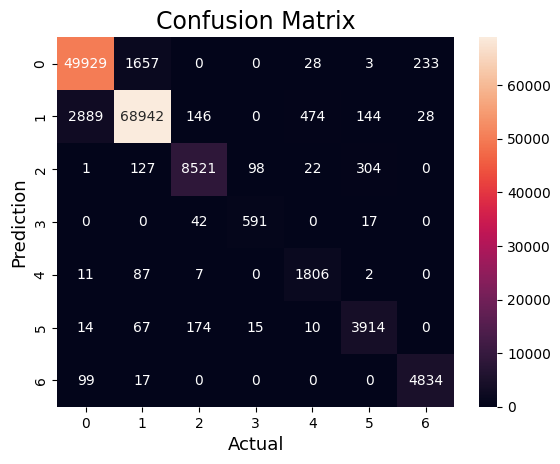

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

c_m = confusion_matrix(y_pred, y_test)
sns.heatmap(c_m, annot=True, fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Hyperparamter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [2, 3, None],
    'max_leaf_nodes': [2, 3, None]
}

grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid,
                           n_jobs=10)

grid_search.fit(x_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(n_estimators=150)


Retrain the model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import psutil
import time

classifier= grid_search.best_estimator_

memory_usage_b = psutil.virtual_memory()[3]/1000000000
start_time = time.time()

classifier.fit(x_train, y_train)

end_time = time.time()
memory_usage_a = psutil.virtual_memory()[3]/1000000000

training_time = end_time - start_time
memory_usage = (memory_usage_a - memory_usage_b)*1000

y_pred= classifier.predict(x_test)
print(classification_report(y_pred, y_test))

accuracy = accuracy_score(y_pred, y_test)

print(f"Accuracy: {accuracy:.4f}")
print(f"Random Forest Training time: {training_time} seconds")
print(f"Random Forest Memory usage: {memory_usage} MB")

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     51806
           1       0.97      0.95      0.96     72644
           2       0.96      0.94      0.95      9075
           3       0.84      0.92      0.88       645
           4       0.78      0.95      0.85      1925
           5       0.90      0.94      0.92      4202
           6       0.95      0.98      0.96      4956

    accuracy                           0.95    145253
   macro avg       0.91      0.95      0.93    145253
weighted avg       0.96      0.95      0.95    145253

Accuracy: 0.9544
Random Forest Training time: 177.3282651901245 seconds
Random Forest Memory usage: 1183.145893214845 MB


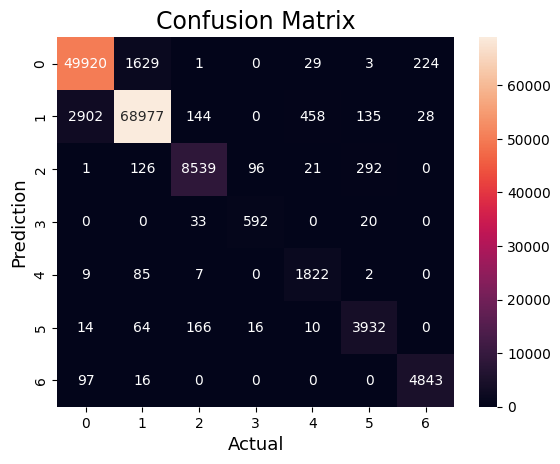

In [ ]:
c_m = confusion_matrix(y_pred, y_test)
sns.heatmap(c_m, annot=True, fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

## XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import psutil
import time

classifier= XGBClassifier()

memory_usage_b = psutil.virtual_memory()[3]/1000000000
start_time = time.time()

classifier.fit(x_train, y_train)

end_time = time.time()
memory_usage_a = psutil.virtual_memory()[3]/1000000000

training_time = end_time - start_time
memory_usage = (memory_usage_a - memory_usage_b)*1000

y_pred= classifier.predict(x_test)
print(classification_report(y_pred, y_test))

accuracy = accuracy_score(y_pred, y_test)

print(f"Accuracy: {accuracy:.4f}")
print(f"XGBoost Training time: {training_time} seconds")
print(f"XGBoost Memory usage: {memory_usage} MB")

              precision    recall  f1-score   support

           0       0.84      0.87      0.85     51462
           1       0.90      0.87      0.88     73399
           2       0.91      0.90      0.91      8984
           3       0.85      0.88      0.87       676
           4       0.58      0.88      0.70      1542
           5       0.82      0.85      0.83      4221
           6       0.92      0.95      0.93      4969

    accuracy                           0.87    145253
   macro avg       0.83      0.88      0.85    145253
weighted avg       0.87      0.87      0.87    145253

Accuracy: 0.8716
XGBoost Training time: 150.2235882282257 seconds
XGBoost Memory usage: 363.8149119999998 MB


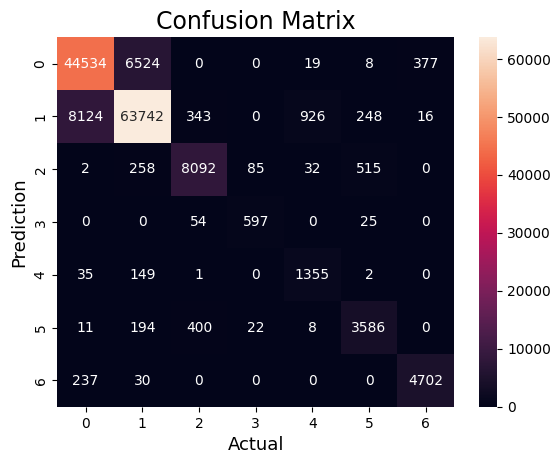

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

c_m = confusion_matrix(y_pred, y_test)
sns.heatmap(c_m, annot=True, fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier

params = {
    "colsample_bytree": [0.5, None],
    "gamma": [0.2, None],
    "learning_rate": [0.9, None],
    "max_depth": [15, None],
    "n_estimators": [100, 150, None],
    "subsample": [0.9, None]
}

grid_search = GridSearchCV(XGBClassifier(),
                           param_grid=params,
                           n_jobs=10)

grid_search.fit(x_train, y_train)
print(grid_search.best_estimator_)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)


In [ ]:
# Define and train the XGBoost model
classifier = grid_search.best_estimator_

memory_usage_b = psutil.virtual_memory()[3]/1000000000
start_time = time.time()

classifier.fit(x_train, y_train)

end_time = time.time()
memory_usage_a = psutil.virtual_memory()[3]/1000000000

training_time = end_time - start_time
memory_usage = (memory_usage_a - memory_usage_b)*1000

y_pred= classifier.predict(x_test)
print(classification_report(y_pred, y_test))

accuracy = accuracy_score(y_pred, y_test)

print(f"Accuracy: {accuracy:.4f}")
print(f"XGBoost Training time: {training_time} seconds")
print(f"XGBoost Memory usage: {memory_usage} MB")

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     52821
           1       0.98      0.97      0.97     71233
           2       0.97      0.96      0.97      8915
           3       0.88      0.92      0.90       674
           4       0.89      0.93      0.91      2246
           5       0.94      0.95      0.94      4312
           6       0.97      0.97      0.97      5052

    accuracy                           0.97    145253
   macro avg       0.94      0.95      0.95    145253
weighted avg       0.97      0.97      0.97    145253

Accuracy: 0.9700
XGBoost Training time: 221.32602381706238 seconds
XGBoost Memory usage: 445.9429680000002 MB


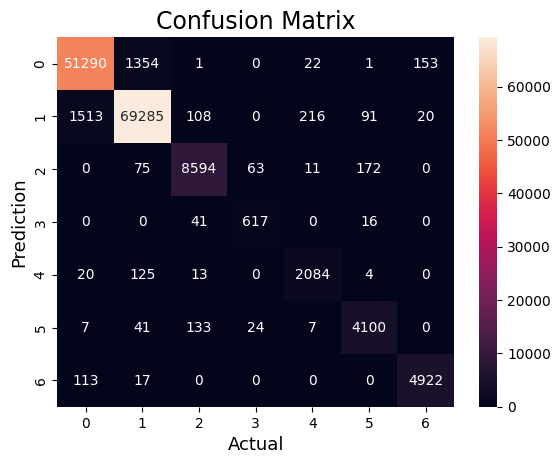

In [ ]:
c_m = confusion_matrix(y_pred, y_test)
sns.heatmap(c_m, annot=True, fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()